# Studi Kasus 2502001164-Marcelius Surya Wijaya

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

# Data waktu dan Kecepatan
waktu = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520]
kecepatan = [0, 139, 298, 433, 685, 1026, 1279, 1373, 1490, 1634, 1800, 1986, 2191, 2417, 2651, 2915, 3203, 3516, 3860, 4216, 4630, 5092, 5612, 6184, 6760, 7327, 7581]

A. Waktu terhadap kecepatan roket

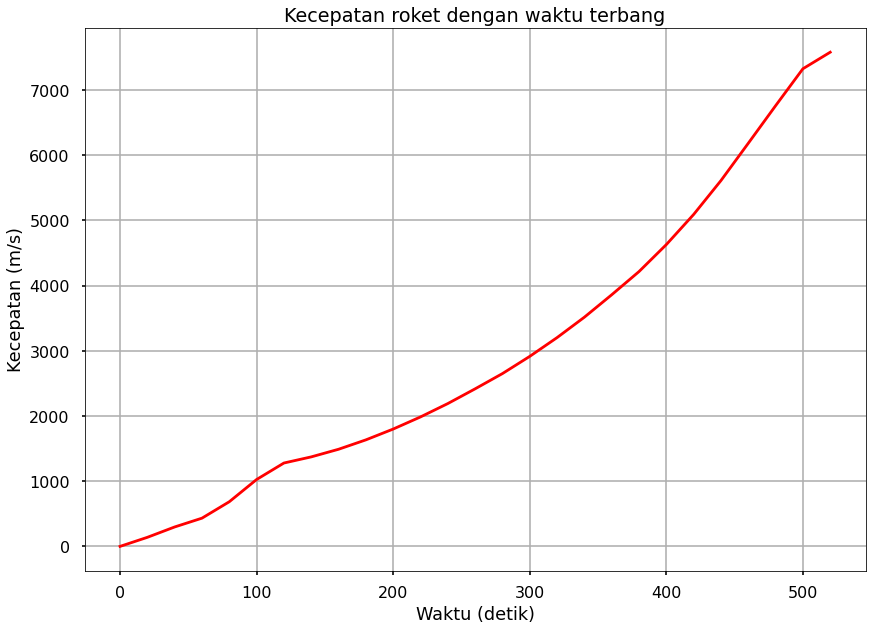

In [ ]:
f = CubicSpline(waktu, kecepatan, bc_type="natural")

# Set nilai
t1 = np.linspace(0, 520, 100)
v1 = f(t1)

# Plot
plt.style.use('seaborn-poster')
plt.figure(figsize=(14, 10))
plt.title("Kecepatan roket dengan waktu terbang")
plt.plot(waktu, kecepatan, 'r-')
plt.xlabel('Waktu (detik)')
plt.ylabel('Kecepatan (m/s)')
plt.grid()
plt.show()

B. Mencari t saat roket mencapai lapisan stratosphere (12.000 meter), mesosphere (50.000 meter), dan exosphere
(800.000 meter)

In [ ]:
def gral(f, a, b, n):
    x = np.linspace(a, b, n + 1)
    y = f(x)
    h = (b - a) / n
    answ = h/3*np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return answ

ct = 0
print('Lapisan stratosphere (12.000 meter)')
while(ct <= 520):
    r = gral(f, 0, ct, 10)
    if r >= 12000:
        print(f'Dicapai pada {ct} detik\n')
        break
    ct += 0.1

ct = 0
print('Lapisan mesosphere (50.000 m)')
while(ct <= 520):
    r = gral(f, 0, ct, 10)
    if r >= 50000:
        print(f'Dicapai pada {ct} detik\n')
        break
    ct += 0.1

ct = 0
print('Lapisan exosphere (800.000 m)')
while(ct <= 520):
    r = gral(f, 0, ct, 10)
    if r >= 800000:
        print(f'Dicapai pada {ct} detik')
        break
    ct += 0.1



Lapisan stratosphere (12.000 meter)
Dicapai pada 57.70000000000055 detik

Lapisan mesosphere (50.000 m)
Dicapai pada 108.29999999999812 detik

Lapisan exosphere (800.000 m)
Dicapai pada 402.0000000000229 detik


C. Percepatan roket saat terbang (dari awal - akhir)

In [ ]:
def secForward(f, x, h):
    secFrwd = (-f(x + 2 * h) + 4 * f(x + h) - 3 * f(x)) / (2 * h)
    return secFrwd

print('Detik | Percepatan')
for i in range(0, 521, 20):
    percepatan = secForward(f, i, 0.1)
    print(f' {i} | {percepatan} m/s**2')

Detik | Percepatan
 0 | 6.509320424662979 m/s**2
 20 | 7.831375249305381 m/s**2
 40 | 6.865288578114814 m/s**2
 60 | 8.807117938232523 m/s**2
 80 | 15.95630966894987 m/s**2
 100 | 16.318085885957316 m/s**2
 120 | 7.8715242872135605 m/s**2
 140 | 4.245361965176926 m/s**2
 160 | 6.797017852086356 m/s**2
 180 | 7.716579126476972 m/s**2
 200 | 8.836670641981073 m/s**2
 220 | 9.736740805583395 m/s**2
 240 | 10.866361135676925 m/s**2
 260 | 11.447847151694077 m/s**2
 280 | 12.342195257551793 m/s**2
 300 | 13.883386818115468 m/s**2
 320 | 14.9242549700557 m/s**2
 340 | 16.56957830173269 m/s**2
 360 | 17.34747932307073 m/s**2
 380 | 19.04038940603641 m/s**2
 400 | 21.990988052857574 m/s**2
 420 | 24.395633382664528 m/s**2
 440 | 27.726493416557787 m/s**2
 460 | 28.498512951118755 m/s**2
 480 | 30.479487279026216 m/s**2
 500 | 21.034297932856134 m/s**2
 520 | 8.532538489598664 m/s**2


D. Show Plot

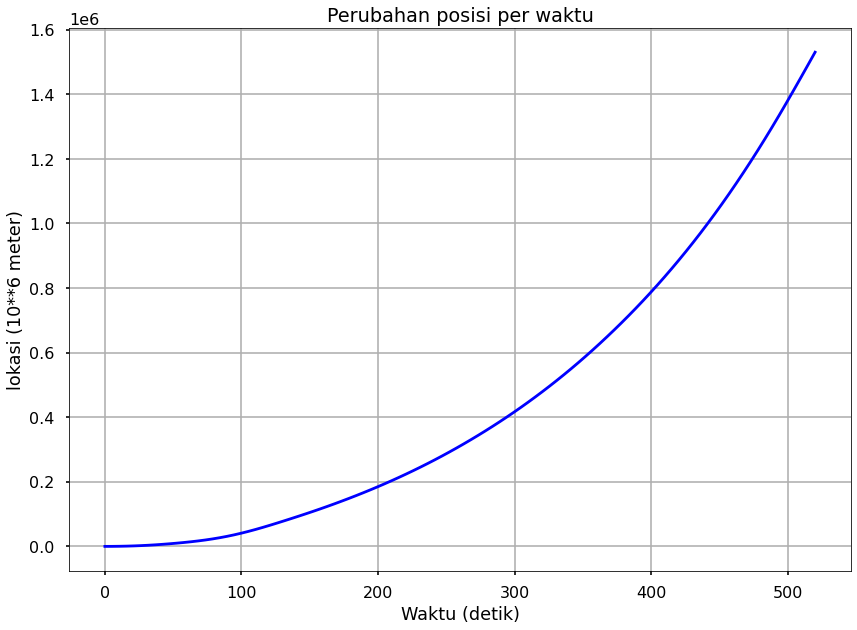

In [ ]:
# Perubahan posisi per waktu
t1 = np.linspace(0, 520, 100)
v1 = []

for i in range(0, 100):
    v1Exsp= gral(f, 0, t1[i], 100)
    v1.append(v1Exsp)

plt.style.use('seaborn-poster')
plt.figure(figsize=(14, 10))
plt.title('Perubahan posisi per waktu')
plt.plot(t1, v1, 'b-')
plt.xlabel('Waktu (detik)')
plt.ylabel('lokasi (10**6 meter)')
plt.grid()
plt.show()

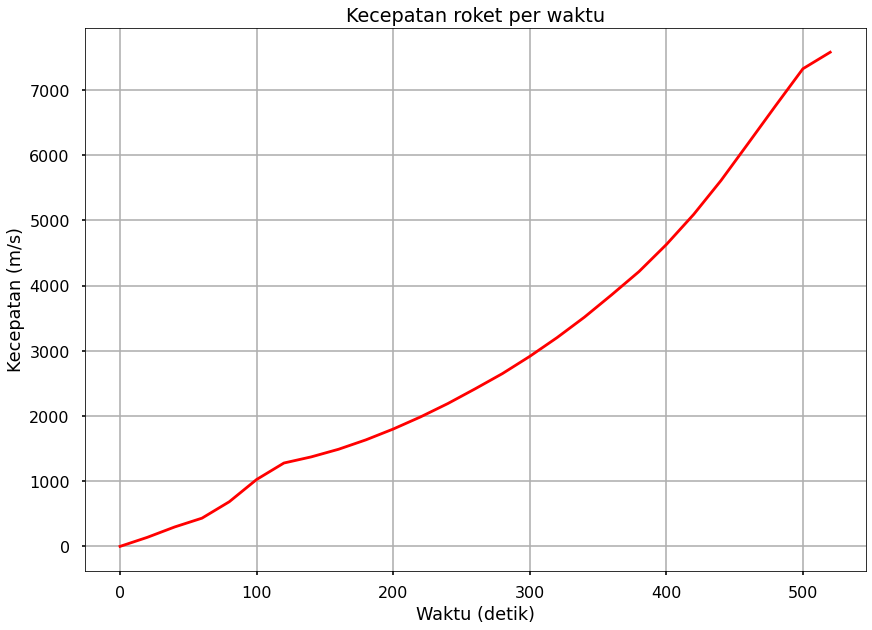

In [ ]:
#  Kecepatan roket per waktu
f = CubicSpline(waktu, kecepatan, bc_type="natural")

# Set nilai
t1 = np.linspace(0, 520, 100)
v1 = f(t1)

# Plot
plt.style.use('seaborn-poster')
plt.figure(figsize=(14, 10))
plt.title('Kecepatan roket per waktu')
plt.plot(waktu, kecepatan, 'r-')
plt.xlabel('Waktu (detik)')
plt.ylabel('Kecepatan (m/s)')
plt.grid()
plt.show()

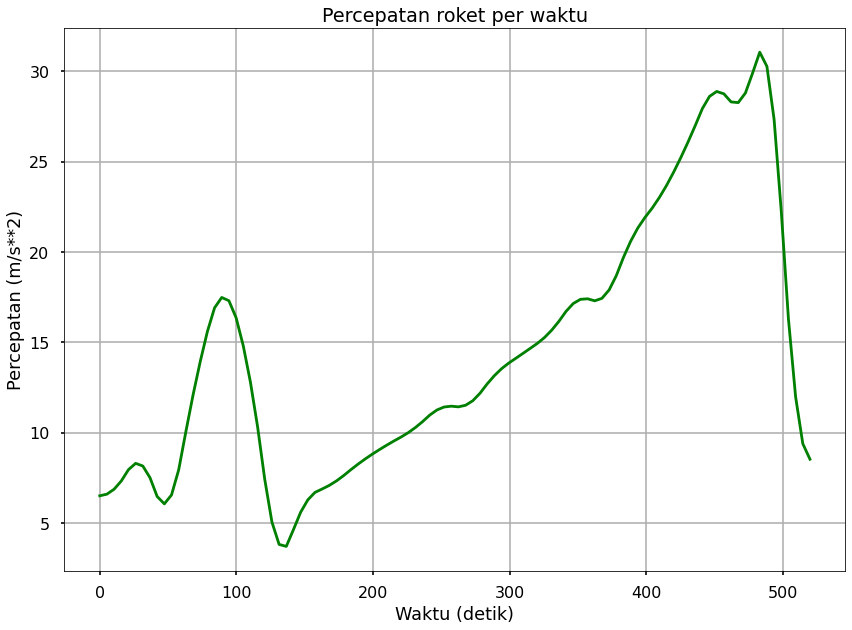

In [ ]:
# Percepatan roket per waktu
# Set nilai
ta = np.linspace(0, 520, 100)
va = secForward(f, ta, 0.1)

# Plot
plt.style.use('seaborn-poster')
plt.figure(figsize=(14, 10))
plt.title('Percepatan roket per waktu')
plt.plot(ta, va, 'g-')
plt.xlabel('Waktu (detik)')
plt.ylabel('Percepatan (m/s**2)')
plt.grid()
plt.show()